In [ ]:
import numpy as np
import pandas as pd
import os 
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from scipy import datasets,stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Target variable (dependant variable ) a quantitative measure of disease progression one year after baseline

In [ ]:
df = sklearn.datasets.load_diabetes()
df_desc = df['DESCR']
df_features = df['feature_names']    
df_data = df['data']
df_complete = pd.DataFrame(data=df_data,columns=df_features)
df_target = df["target"]
display(df_complete)
print(df_desc)
df_complete['TARGET']= df_target
df_target

### Get information about the dataset with DESCRIB.
# All features are numerical 



In [ ]:
df_complete.info()


# 10 features columns , all float

In [ ]:
df_complete.isnull().sum()

### No null values
### duplicates?

In [ ]:
df_complete.duplicated().sum()

# NO!

In [ ]:
df_complete.corr()

In [ ]:
plt.Figure(figsize=(16,12))
sns.heatmap(df_complete.corr(),cmap='RdBu',annot=True,vmax=1,vmin=-1,cbar=True)

In [ ]:
df_complete.describe()

## Show kde plots for each numerical value

In [ ]:
for col in df_complete.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df_complete[col],kde=True)
    plt.title(f'Distribution of numerical variable {col}')
    plt.ylabel('Frequency')

In [ ]:
sns.boxplot(x=df_complete['sex'],y=df_complete['age'])
df_complete['sex'].value_counts

## Sex variable (categorical?)

### For the normalization purpose, categorical data is converted to float like data type
### it is still categorical but small float -0.04 is represented as 0 and 1 is represented as 0.05 

In [ ]:
df_sex_cat = df_complete['sex'].apply(lambda x: 'male' if x > 0 else 'female')
df_sex_cat

In [ ]:
sns.boxplot(x=df_sex_cat,y=df_complete['TARGET'])

In [ ]:
sns.scatterplot(x=df_complete['bmi'],y=df_complete['TARGET'],hue=df_sex_cat)

In [ ]:
sns.scatterplot(x=df_complete['s5'],y=df_complete['TARGET'],hue=df_sex_cat)

In [ ]:
df_complete.corr()['TARGET'].sort_values()
for col in df_complete.columns[:-1]: # Slice to -1 because -1 is TARGET and no need for target vs target. Its 45 degrees slope
    if col =='sex': #also no need to compare with categorical feature so i skip it
        continue
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=df_complete[col],y=df_target,hue=df_sex_cat)
    plt.ylabel('Target')
    plt.xlabel(f'Feature - {col}')
    plt.title(f'Scatterplot: Target vs {col.upper()}')
    plt.show()

In [ ]:
# Also i could do like this:

for col in df_complete.columns[:-1]:
    if col =='sex':
        continue
    plt.figure(figsize=(16,12))
    fig,ax = plt.subplots(nrows=1,ncols=2,squeeze=True,sharex=True)
    sns.scatterplot(ax=ax[0],x=df_complete[col],y=df_target,hue=df_sex_cat)
    sns.regplot(ax=ax[1],x=df_complete[col],y=df_target)
    fig.suptitle(f'scatter vs regression plot | feature - {col}')
    fig.supxlabel('Independant variable')
    fig.supylabel('Dependant variable')
    fig.tight_layout()
    sns.despine(fig,right=True)

### After inspecting these visuals, we can give some conclusion:  `my raw conclusions`


- bmi seems like a good predictor, relationship is linear mostly

- s6 seems fine

- s5 seems very good

- bp seems also fine

### __Coefficient of determination__, __MSE__

In [ ]:
r2_dict = {}
df_complete.columns
selected_features = df_complete.iloc[:,[2,3,4,-3,-2]] #manually selected :C
selected_features
selected_features['target'] = df_target
selected_features


### for every column (`feature`) I will take parameters to compute the `r2_score`

R^2 - coefficient of determination aka predictive power. How variance in X explains variance in Y

In [ ]:
selected_features.drop(columns=['target'],inplace=True)


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
def get_features(df):
    feature_storage = []
    for col in df.columns:
        feature_storage.append((col,df[col].to_numpy()))
    return feature_storage

x = get_features(selected_features)

In [ ]:
y = df_target
def compute_r2(features,y):
    r2_container = []

    for _,X in features: # _ -> jer x iz gornje funkcije ima oblik ( 'name_col', array([])), tako da samo x reshape da bi imao 2dim za LR
        X = X.reshape(-1,1) # ukoliko je ndim=1 ne moze u model
        X_trainV1,X_testV1,y_trainV1,y_testV1 = train_test_split(
            X,y,random_state=42,train_size=0.8)
        regression_model = LinearRegression()
        regression_model.fit(X_trainV1,y_trainV1)
        y_predV1 = regression_model.predict(X_testV1)
        r2 = r2_score(y_testV1,y_predV1)        
        r2_container.append(r2) 

    return r2_container
result = compute_r2(x,y)
print(result)

In [ ]:
dict_1 = dict(zip(result,selected_features.columns)) #coefficient of determination
dict_1


#### R^2 when comparing 1 feature with target THEN

### >R^2 = r^2 !!!

In [ ]:
make_array = np.array([result])
r_score = np.sqrt(make_array)
print(f"Selected features coefficient of correlation: {r_score}")

### `S5` is the best predictor of disease progression!

### Dropped s2 later but order is shuffled due to deletign/inserting new code
--- 

### **Multivariate model**

In [114]:
X = selected_features
y = df_target.reshape(-1,1)
# multivariate regression
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=49)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_hat = regressor.predict(X_test)

r2 = r2_score(y_test,y_hat)
MSE = mean_squared_error(y_test,y_hat)
resid = y_test - y_hat
resid.reshape(-1).shape

(89,)

In [116]:
resid = resid.reshape(-1)

### Histplot of residuals
## Goal:

- check for the normality 

- check for patterns

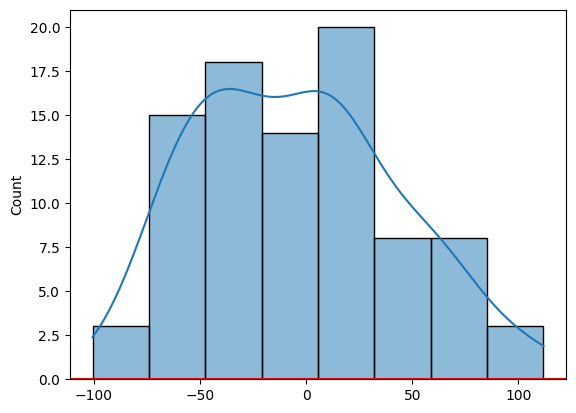

In [117]:
sns.histplot(x=resid,kde=True,cbar=True,cbar_ax=1)
plt.axhline(y=0,color='red')

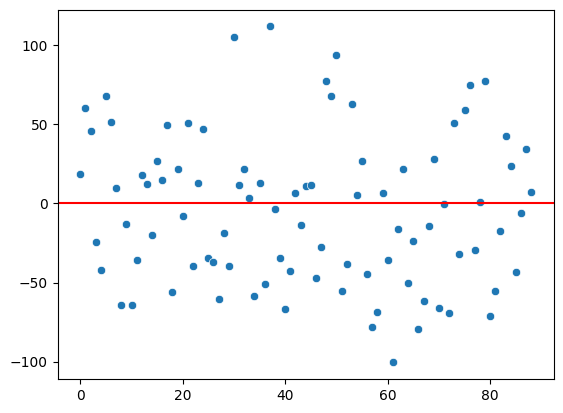

In [129]:
y_hat=y_hat.reshape(-1)
sns.scatterplot(resid)
plt.axhline(y=0,c='r')

# stigao sam ovde, residual variance!!!!!

---

In [ ]:
# check for multicolinearity between s1-s6
df_blood_serum = df_complete.iloc[:,4:10]
df_blood_serum.corr()




In [ ]:
sns.heatmap(df_blood_serum.corr(),cmap='rocket',vmax=1,vmin=-1,annot=True)

## S2 and S1 corr = 0.9 WHich one to drop???
### Lets observe s2 and S1 relationship with target variable.

In [ ]:
sns.heatmap(df_complete.corr(),cmap='rocket',vmin=-1,vmax=1,annot=True)

## S1 predicts the target better 0.21 > 0.17 
### dropping S2 from the dataset in regards to multicolinearity between s1-s2

In [ ]:
df_complete.drop(columns={'s2'},inplace=True)


In [ ]:
df_complete.head()

In [ ]:
sns.boxplot(x=df_sex_cat,y=df_complete['bp'])
# bloodpressure is higher in males than females
# also body mass index


In [ ]:
sns.boxplot(x=df_sex_cat,y=df_complete['s1'])
#Total cholesterol ration



In [ ]:
sns.boxplot(x=df_sex_cat,y=df_complete['s3'])
#good cholesterol


In [ ]:
sns.boxplot(x=df_sex_cat,y=df_complete['s4'])
# expected for males, because of TCH/HDL, they have less HDL and more total TCH in their blood samples

In [ ]:
sns.boxplot(x=df_sex_cat,y=df_complete['s5'])
#log serum triglycerides



In [ ]:
sns.boxplot(x=df_sex_cat,y=df_complete['s6'])


In [ ]:
#Quantify the correlation

df_complete.corr()['TARGET'].sort_values()

In [ ]:
for col in selected_features.columns:
    sns.regplot(data=selected_features,y=df_complete['TARGET'],x=selected_features[col])
    plt.title(f"{col} VS Target")
    plt.show()

In [ ]:
id = pd.Index([1, 3, 5, 7, 9])
iB = pd.Index([2, 3, 5, 7, 11])

id | iB

In [ ]:
z = pd.Series([1,2,3,4,10,100,1000],index=[10,20,30,40,60,90,100])
z[100]= 14
z
list(z.keys())
x = pd.Series({'country':['Serbia','Pakistan']})
y = pd.Series({'arbitage':(123,14)})
z = pd.DataFrame({'population':x,'number':y})
z

### regression model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y.info

In [ ]:
# testing for bmi
X = df_complete[['bmi']]
y = df_complete[['TARGET']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [ ]:
print(f"Model r2 score is {r2_score(y_test,y_pred)}")
print(f"Model MSE is {mean_squared_error(y_test,y_pred)}")

### Baseline MSE

In [ ]:
baseline_mse = np.mean((y_test - y_train.mean())**2)
baseline_mse

In [ ]:
# manual LR
# slope = r * std_x/std_y
import math
x = np.array([40,50,60,70])
y = np.array([55,69,84,87])
mean_x = x.mean()
mean_y = y.mean()
np_std = np.std(x)
std_x1 = ((x[0] - mean_x))**2/4
std_x2 = ((x[1] - mean_x))**2/4
std_x3 = ((x[2] - mean_x))**2/4
std_x4 = ((x[3] - mean_x))**2/4
l2 = [std_x1,std_x2,std_x3,std_x4]
std_manual = math.sqrt(sum(l2))

std_manual,np_std
#slope 
#correlation = np.corrcoef() # ovo ovde! zapisi i nauci
# Pearson's coefficient of correlation says how well variance in the independant variable explains the variance in the target
# variable

In [ ]:
# R2 score
from sklearn.metrics import r2_score
r2_score = y